# Importing Libraries & Reading the CSV File

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from time import strptime

In [2]:
# Read file
# Place loan.csv file in the same folder as that of this notebook

df_loan = pd.read_csv("loan.csv", low_memory=False)

In [3]:
# Get Type of the columns

df_loan.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

# Data Cleaning

## Step 1 - Fix Rows and columns

### Step 1.1 - Remove columns with NULL values in all rows

In [4]:
# Create a dataframe with columns that has valid values. 
# Remove columns that has NaN value across all the rows

df_loan_subset = df_loan.dropna(axis=1, how="all")
df_loan_subset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

### Step 1.2 - Removing current loans

In [5]:
#### Current loans - These are loans in progress and the data is not entirely relevant to analyze payment defaults. 
#### So, this data will be removed from the analysis dataset

In [6]:
df_loan_subset = df_loan_subset[~(df_loan_subset.loan_status == 'Current')]
df_loan_subset.shape


(38577, 57)

#### Step 1.2.1 - Remove columns related to "Current" loans

In [7]:
#### The dataset has certain columns related to the current loans. 
#### Given we are removing the rows for current loans in Step 2, these columns are not relevant anymore
#### The following columns will be removed
####['inq_last_6mths','last_credit_pull_d','last_pymnt_amnt','last_pymnt_d','mths_since_last_delinq','mths_since_last_record',
####'next_pymnt_d','out_prncp','out_prncp_inv','total_acc','total_rec_int','total_rec_late_fee','total_rec_prncp','verification_status']

In [8]:
## Drop columns related to current loans
lst_currloan_col = ['inq_last_6mths','last_credit_pull_d','last_pymnt_amnt','last_pymnt_d','mths_since_last_delinq','mths_since_last_record',
                    'next_pymnt_d','out_prncp','out_prncp_inv','total_acc','total_rec_int','total_rec_late_fee','total_rec_prncp']

df_loan_subset.shape
#uncomment finally
df_loan_subset = df_loan_subset.drop(lst_currloan_col, axis = 1)
df_loan_subset.shape

(38577, 44)

### Step 1.3 - Dropping columns based on cardinality

In [9]:
#### Dropping columns that have a large number of unique values and may not be very relevant for analysis
#### Dropping columns that have only 1 value across all rows. This too is not relevant for analysis

#### The following columns will be removed 
#### 1) Large number of unique values - ['id','member_id','emp_title','url','desc','title','zip_code']
#### 2) columns having just 1 unique value - ['pymnt_plan','initial_list_status','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens'] 

In [10]:
lst_dropcol_highcardinality = ['id','member_id','emp_title','url','desc','title','zip_code']
lst_dropcol_lowcardinality = ['pymnt_plan','initial_list_status','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens']
#uncomment finally
df_loan_subset = df_loan_subset.drop(lst_dropcol_highcardinality, axis = 1)
df_loan_subset = df_loan_subset.drop(lst_dropcol_lowcardinality, axis = 1)
df_loan_subset.shape
df_loan_subset.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                38577 non-null  int64  
 1   funded_amnt              38577 non-null  int64  
 2   funded_amnt_inv          38577 non-null  float64
 3   term                     38577 non-null  object 
 4   int_rate                 38577 non-null  object 
 5   installment              38577 non-null  float64
 6   grade                    38577 non-null  object 
 7   sub_grade                38577 non-null  object 
 8   emp_length               37544 non-null  object 
 9   home_ownership           38577 non-null  object 
 10  annual_inc               38577 non-null  float64
 11  verification_status      38577 non-null  object 
 12  issue_d                  38577 non-null  object 
 13  loan_status              38577 non-null  object 
 14  purpose               

### Step 1.4 - Removing columns that are not relevant

In [11]:
#### Removing columns that are not relevant for analysis
#### The following columns are removed
#### loan_status, delinq_2yrs, earliest_cr_line, recoveries, collection_recovery_fee

lst_irrelevant_col = ['delinq_2yrs','earliest_cr_line','recoveries','collection_recovery_fee','open_acc','revol_bal']
df_loan_subset = df_loan_subset.drop(lst_irrelevant_col, axis = 1)
df_loan_subset.shape

(38577, 22)

# Step 2 - Handling Missing Values

In [12]:
### Step 2.1 - Identify columns with NULL values

In [13]:
df_loan_subset.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
pub_rec                    0
revol_util                50
total_pymnt                0
total_pymnt_inv            0
pub_rec_bankruptcies     697
dtype: int64

In [14]:
### Step 2.2 - Handle NaN values

In [15]:
# Handle NaN values in emp_length column. "0" could mean that the borrowers are either not working,students etc
df_loan_subset['emp_length'].fillna("0", inplace=True)
df_loan_subset['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
0            1033
Name: emp_length, dtype: int64

In [16]:
#Handle NaN values in revol_util column. Since, this is a numeric column, using 0 as the replacement value
df_loan_subset['revol_util'].fillna(0.0,inplace=True)
df_loan_subset['revol_util'].value_counts()

0%        954
0.20%      62
63%        62
40.70%     57
31.20%     57
         ... 
77.63%      1
25.74%      1
0.83%       1
47.36%      1
7.28%       1
Name: revol_util, Length: 1089, dtype: int64

# Step 4 - Understand the correlation between the continous variables

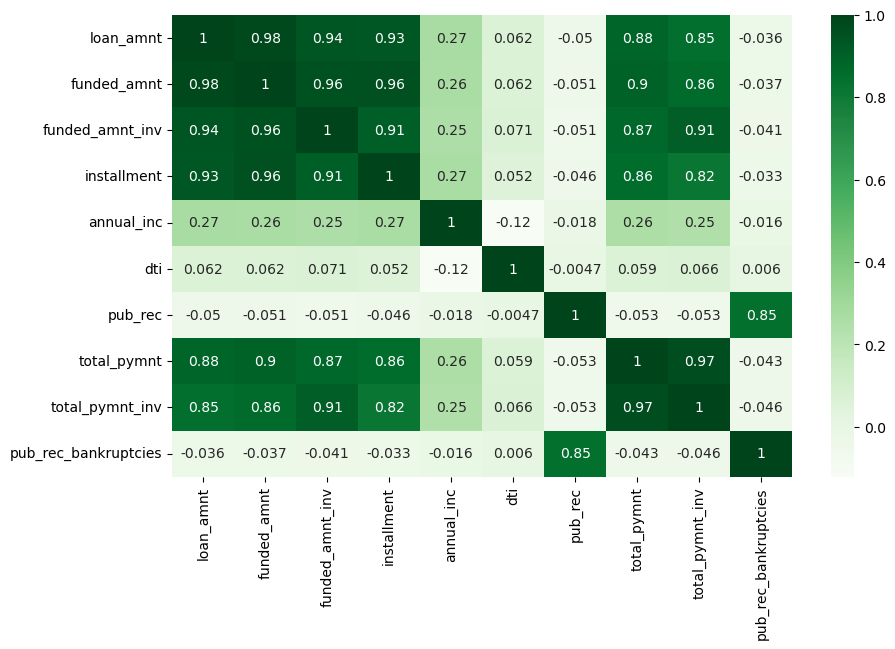

In [17]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(df_loan_subset.corr(), cmap="Greens",annot=True, ax=ax)
plt.show()

### Step 6.3 - Remove highly correlated columns as they do not make much difference to the analysis


In [18]:
#### Based on the corelation heatmap, the follwoing columns are highly corelated. 
#### So, there is a potential to remove some of the columns that are highly correlated.

##### 1) funded_amnt, funded_amnt_inv and installment are highly corelated with loan_amnt
##### 2) total_pymnt is highly corelated with total_pymnt_inv, loan_amnt
##### 3) pub_rec_bankruptcies is highly correlated with pub_rec
##### 4) Based on teh above explanation, the following columns will be removed
#####    ['funded_amnt,'funded_amnt_inv','installment','total_pymnt','total_pymnt_inv',pub_rec_bankruptcies']

In [19]:
lst_corr_cols = ['funded_amnt','funded_amnt_inv','installment','total_pymnt','total_pymnt_inv','pub_rec_bankruptcies']
df_loan_subset = df_loan_subset.drop(lst_corr_cols,axis = 1)

# Step 3 - Standardising Values

### Step 3.1 - Standardising data types
#### Clean numerical data in Object type columns to be able to analyse 

In [20]:
# Remove % symbol from int_rate, revol_util columns and convert to float type
df_loan_subset['int_rate'] = df_loan_subset['int_rate'].str[:-1].astype(float)
df_loan_subset['revol_util'] = df_loan_subset['revol_util'].str[:-1].astype(float)

In [21]:
# standardise values in emp_length column
df_loan_subset['emp_length'] = df_loan_subset['emp_length'].str.extract('(\d+)', expand=False).astype(int)

### Step 3.2 - Standardising Precision

#### Set precision of float columns to 2 decimal places

In [22]:
#int_rate
df_loan_subset['int_rate'] = round(df_loan_subset['int_rate'],2)

#annual_inc
df_loan_subset['annual_inc'] = round(df_loan_subset['annual_inc'],2)

#dti
df_loan_subset['dti'] = round(df_loan_subset['dti'],2)

#revol_util
df_loan_subset['revol_util'] = round(df_loan_subset['revol_util'],2)

### Step 3.3 - Removing Outliers

In [23]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df_loan_subset.describe()

,loan_amnt,int_rate,emp_length,annual_inc,dti,pub_rec,revol_util
count,38577.00000,38577.00000,38577.00000,38577.00000,38577.00000,38577.00000,38527.00000
mean,11047.02543,11.93222,4.92553,68777.97368,13.27273,0.05542,48.70278
std,7348.44165,3.69133,3.45392,64218.68180,6.67304,0.23780,28.36474
min,500.00000,5.42000,0.00000,4000.00000,0.00000,0.00000,0.00000
25%,5300.00000,8.94000,2.00000,40000.00000,8.13000,0.00000,25.20000
50%,9600.00000,11.71000,4.00000,58868.00000,13.37000,0.00000,49.10000
75%,15000.00000,14.38000,9.00000,82000.00000,18.56000,0.00000,72.30000
max,35000.00000,24.40000,10.00000,6000000.00000,29.99000,4.00000,99.90000


<AxesSubplot:>

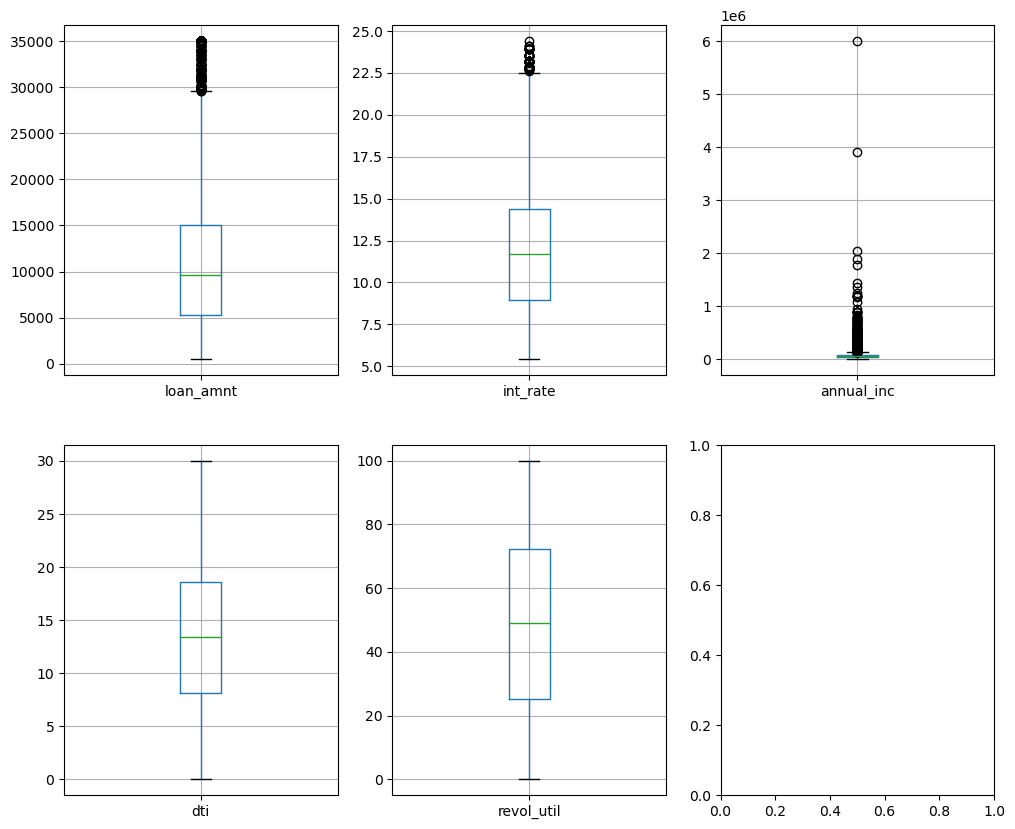

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,10))

df_loan_subset.boxplot(column='loan_amnt', ax=axes[0,0])
df_loan_subset.boxplot(column='int_rate', ax=axes[0,1])
df_loan_subset.boxplot(column='annual_inc', ax=axes[0,2])
df_loan_subset.boxplot(column='dti', ax=axes[1,0])
df_loan_subset.boxplot(column='revol_util', ax=axes[1,1])


In [25]:
### Removing outliers from important continuous variables - loan_amnt, annual_inc, int_rate

### Removing outliers in annual_inc column
percentile_90_annual_inc = df_loan_subset['annual_inc'].quantile(0.90)

df_loan_subset = df_loan_subset[df_loan_subset['annual_inc'] < percentile_90_annual_inc]
df_loan_subset.describe()


### Removing outliers in loan_amnt column
percentile_90_loan_amnt  = df_loan_subset['loan_amnt'].quantile(0.90)

df_loan_subset = df_loan_subset[df_loan_subset['loan_amnt'] < percentile_90_loan_amnt]
df_loan_subset.describe()

### Removing outliers in int_rate column
#percentile_90_int_rate  = df_loan_subset['int_rate'].quantile(0.90)

#df_loan_subset = df_loan_subset[df_loan_subset['int_rate'] < percentile_90_int_rate]


,loan_amnt,int_rate,emp_length,annual_inc,dti,pub_rec,revol_util
count,30396.00000,30396.00000,30396.00000,30396.00000,30396.00000,30396.00000,30349.00000
mean,8477.66153,11.54258,4.69279,54444.41320,13.41733,0.06093,48.06511
std,4513.02171,3.51330,3.39480,22729.07958,6.70174,0.24878,28.34744
min,500.00000,5.42000,0.00000,4000.00000,0.00000,0.00000,0.00000
25%,5000.00000,8.49000,2.00000,37000.00000,8.23750,0.00000,24.50000
50%,8000.00000,11.49000,4.00000,51000.00000,13.53000,0.00000,48.00000
75%,12000.00000,13.98000,8.00000,70000.00000,18.75250,0.00000,71.50000
max,19950.00000,24.40000,10.00000,114996.00000,29.99000,4.00000,99.90000


<AxesSubplot:>

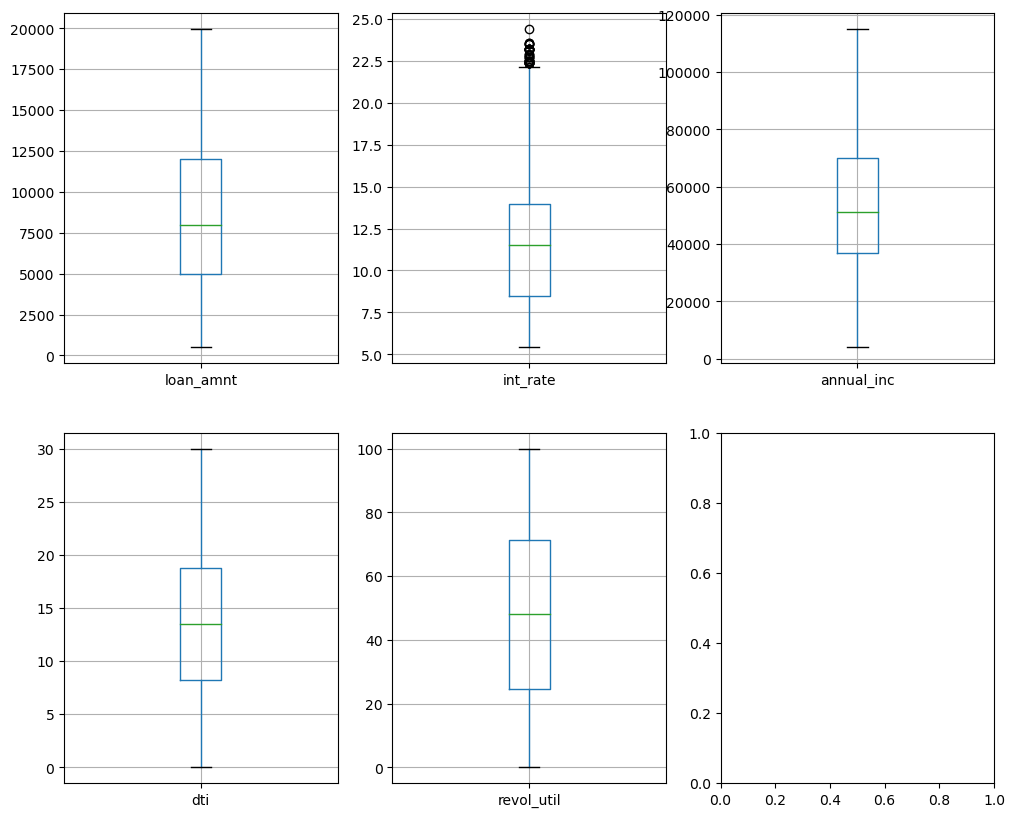

In [26]:


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,10))

df_loan_subset.boxplot(column='loan_amnt', ax=axes[0,0])
df_loan_subset.boxplot(column='int_rate', ax=axes[0,1])
df_loan_subset.boxplot(column='annual_inc', ax=axes[0,2])
df_loan_subset.boxplot(column='dti', ax=axes[1,0])
df_loan_subset.boxplot(column='revol_util', ax=axes[1,1])


## Step 8 - Deriving any additional categorical columns

In [27]:
#### Derive YearMonth to enable calendar sorting 
df_loan_subset['issue_month'] = df_loan_subset['issue_d'].apply(lambda x: '0' + str(strptime(x[0:3],'%b').tm_mon) if  int(str(strptime(x[0:3],'%b').tm_mon))<= 9 else str(strptime(x[0:3],'%b').tm_mon))
df_loan_subset['issue_year'] = df_loan_subset['issue_d'].apply(lambda x: '20' + str(x)[-2:])
df_loan_subset['issue_yearmonth'] = df_loan_subset['issue_year'] + df_loan_subset['issue_month']
df_loan_subset['issue_month'] = df_loan_subset['issue_month'].astype(int)

df_loan_subset.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec,revol_util,issue_month,issue_year,issue_yearmonth
0,5000,36 months,10.65000,B,B2,10,RENT,24000.00000,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65000,0,83.70000,12,2011,201112
1,2500,60 months,15.27000,C,C4,1,RENT,30000.00000,Source Verified,Dec-11,Charged Off,car,GA,1.00000,0,9.40000,12,2011,201112
2,2400,36 months,15.96000,C,C5,10,RENT,12252.00000,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72000,0,98.50000,12,2011,201112
3,10000,36 months,13.49000,C,C1,10,RENT,49200.00000,Source Verified,Dec-11,Fully Paid,other,CA,20.00000,0,21.00000,12,2011,201112
5,5000,36 months,7.90000,A,A4,3,RENT,36000.00000,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20000,0,28.30000,12,2011,201112


# Exploratory Data Analysis

## Step 9 - Univariate Analysis

### Step 9.1 - Understand the split between paid and default loans

In [28]:
df_loan_subset.shape

(30396, 19)

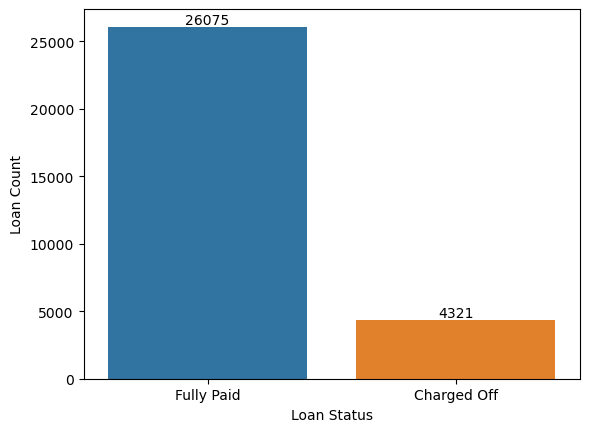

In [29]:
c_loanstatus = sns.countplot(x ='loan_status', data = df_loan_subset)

c_loanstatus.set_xlabel('Loan Status')
c_loanstatus.set_ylabel('Loan Count')

for label in c_loanstatus.containers:
    c_loanstatus.bar_label(label)

plt.show()

### Given the business objective is to understand the driving factors behind loan defaut, a filtered dataset having only "Charged off" data is used to analyse the data against the various categorical field

In [30]:
### Preparing Data for Analysis

#df_loan_subset_fullypaid = df_loan_subset[df_loan_subset['loan_status'] == 'Fully Paid']
df_loan_subset_chargedoff = df_loan_subset[df_loan_subset['loan_status'] == 'Charged Off']
df_loan_subset_chargedoff.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4321 entries, 1 to 39678
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            4321 non-null   int64  
 1   term                 4321 non-null   object 
 2   int_rate             4321 non-null   float64
 3   grade                4321 non-null   object 
 4   sub_grade            4321 non-null   object 
 5   emp_length           4321 non-null   int32  
 6   home_ownership       4321 non-null   object 
 7   annual_inc           4321 non-null   float64
 8   verification_status  4321 non-null   object 
 9   issue_d              4321 non-null   object 
 10  loan_status          4321 non-null   object 
 11  purpose              4321 non-null   object 
 12  addr_state           4321 non-null   object 
 13  dti                  4321 non-null   float64
 14  pub_rec              4321 non-null   int64  
 15  revol_util           4306 non-null   

### Step 9.2 - Analyse the split by various unordered categorical variables

In [31]:
#### The following variables have been identified as Unordered and Ordered categorical variables

#### Unordered categorical variables
##### term
##### home_ownership
##### purpose
##### verification_status


#### Ordered Categorical Variables
##### grade
##### emp_length
##### issue_yearmonth

#### 9.2.1 - Analyse charged off data by categorical variable 'term'

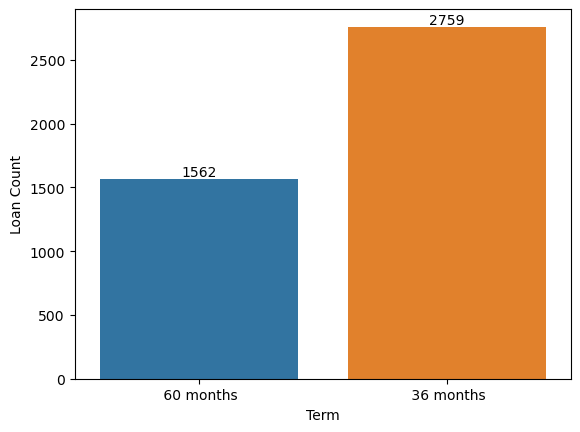

In [32]:
c_term = sns.countplot(x ='term', data = df_loan_subset_chargedoff)

c_term.set_xlabel('Term')
c_term.set_ylabel('Loan Count')

for label in c_term.containers:
    c_term.bar_label(label)

plt.show()

In [33]:
# Get Percentages

df_loan_term = df_loan_subset_chargedoff.groupby('term').count()
df_loan_term['percent'] = (df_loan_term['loan_amnt'] / df_loan_term['loan_amnt'].sum()) * 100
df_loan_term['percent'].sort_values(ascending=False)

term
 36 months   63.85096
 60 months   36.14904
Name: percent, dtype: float64

In [34]:
# Inference
# Borrowers whose repayment term is shorter (36 months) default more than the ones with longer repayment term. 
# Term is not a strong indicator for loan default 

#### 9.2.1 - Analyse charged off data by categorical variable 'home_ownership'

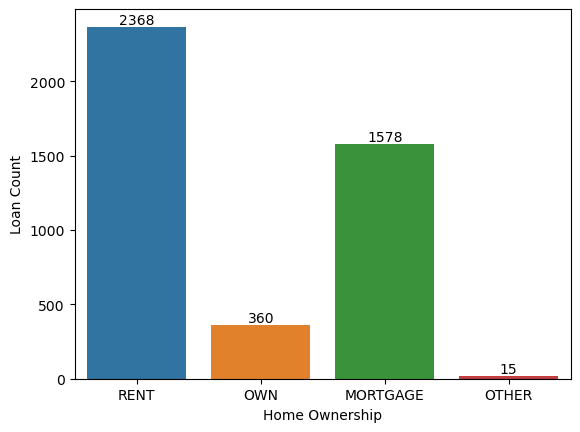

In [35]:
c_ho = sns.countplot(x ='home_ownership', data = df_loan_subset_chargedoff)

c_ho.set_xlabel('Home Ownership')
c_ho.set_ylabel('Loan Count')

for label in c_ho.containers:
    c_ho.bar_label(label)

plt.show()

In [36]:
# Get Percentages

df_loan_ho = df_loan_subset_chargedoff.groupby('home_ownership').count()
df_loan_ho['percent'] = (df_loan_ho['loan_amnt'] / df_loan_ho['loan_amnt'].sum()) * 100
df_loan_ho['percent'].sort_values(ascending=False)

home_ownership
RENT       54.80213
MORTGAGE   36.51932
OWN         8.33140
OTHER       0.34714
Name: percent, dtype: float64

In [37]:
# Inference
# Percentage of borrowers who have a own home and default is much lesser than the percentage of borrowers who are either on rent or mortgage
# home_ownership could be a strong indicator for loan default 

#### 9.2.2 - Analyse charged off data by categorical variable 'Purpose'

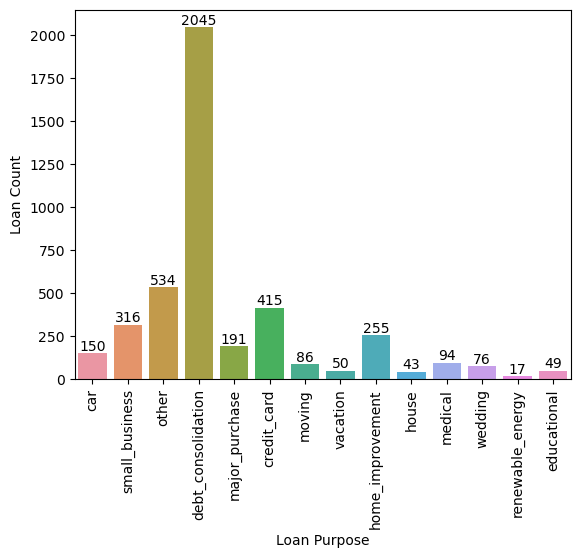

In [38]:
c_purpose = sns.countplot(x ='purpose', data = df_loan_subset_chargedoff)

c_purpose.set_xlabel('Loan Purpose')
c_purpose.set_ylabel('Loan Count')
plt.xticks(rotation="90")
for label in c_purpose.containers:
    c_purpose.bar_label(label)
plt.show()

In [39]:
# Get Percentages

df_loan_purpose = df_loan_subset_chargedoff.groupby('purpose').count()
df_loan_purpose['percent'] = (df_loan_purpose['loan_amnt'] / df_loan_purpose['loan_amnt'].sum()) * 100
df_loan_purpose['percent'].sort_values(ascending=False)

purpose
debt_consolidation   47.32701
other                12.35825
credit_card           9.60426
small_business        7.31312
home_improvement      5.90141
major_purchase        4.42027
car                   3.47142
medical               2.17542
moving                1.99028
wedding               1.75885
vacation              1.15714
educational           1.13400
house                 0.99514
renewable_energy      0.39343
Name: percent, dtype: float64

In [40]:
# Inference
# About 50% of the Borrowers who borrow for the purpose of consolidating debts have defaulted. 
# Purpose is a strong indicator for loan default

#### 9.2.3 - Analyse charged off data by categorical variable 'verification_status'

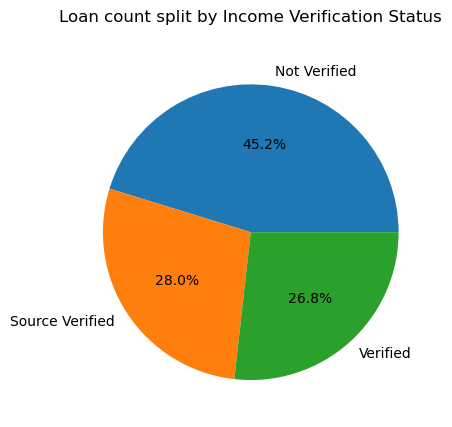

In [41]:
# Get Percentages and plot pie chart

df_loan_vs = df_loan_subset_chargedoff.groupby('verification_status').count()
df_loan_vs['percent'] = (df_loan_vs['loan_amnt'] / df_loan_vs['loan_amnt'].sum()) * 100
df_loan_vs['percent'].sort_values(ascending=False)

plt.pie(df_loan_vs['percent'],labels=df_loan_vs.index,autopct='%1.1f%%')
plt.title('Loan count split by Income Verification Status\n')
plt.show()

In [42]:
# Inference
# 50% of borrowers whose income was not verified had defaulted indicating that verification_status is potentially a strong indicator for default loans


### Step 9.3 - Analyse the split by various ordered categorical variables

#### 9.3.1 - Analyse charged off data by categorical variable 'grade'

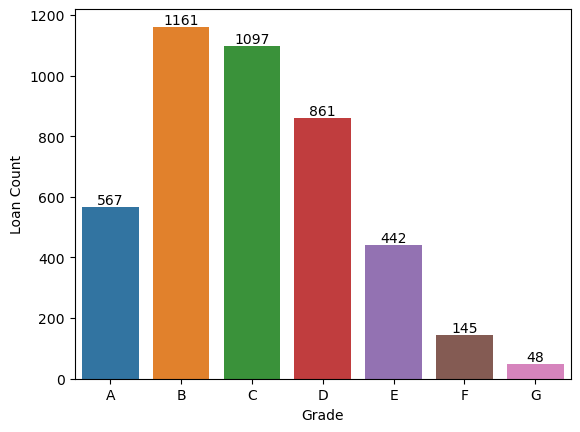

In [43]:
c_vs = sns.countplot(x ='grade', data = df_loan_subset_chargedoff, order=df_loan_subset_chargedoff.groupby('grade').sum().index)
c_vs.set_xlabel('Grade')
c_vs.set_ylabel('Loan Count')
#plt.xticks(rotation="90")
for label in c_vs.containers:
    c_vs.bar_label(label)
plt.show()

In [44]:
# Inference
# Categories B, C and D are the top categories which has more number of loan defaulters

#### 9.3.2 - Analyse charged off data by categorical variable 'emp_length'

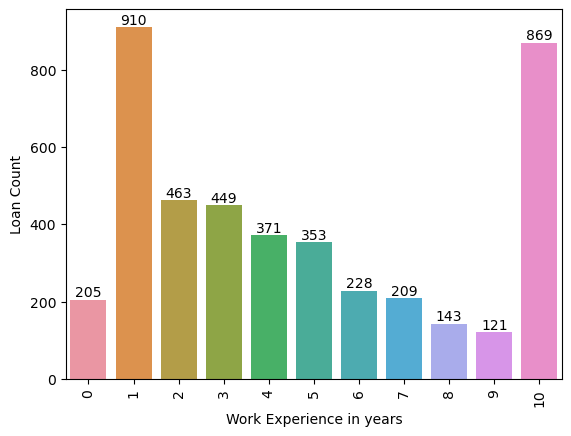

In [45]:
c_el = sns.countplot(x ='emp_length', data = df_loan_subset_chargedoff, order=df_loan_subset_chargedoff.groupby('emp_length').sum().index)
c_el.set_xlabel('Work Experience in years')
c_el.set_ylabel('Loan Count')
plt.xticks(rotation="90")
for label in c_el.containers:
    c_el.bar_label(label)
plt.show()

In [46]:
# Inference
# Borrowers with < 1 year of experience and > 10 years of experience are the major defaulters 
# compared to borrowers with other levels of experience

#### 9.3.3 - Analyse charged off data by categorical variable 'issue_yearmonth'

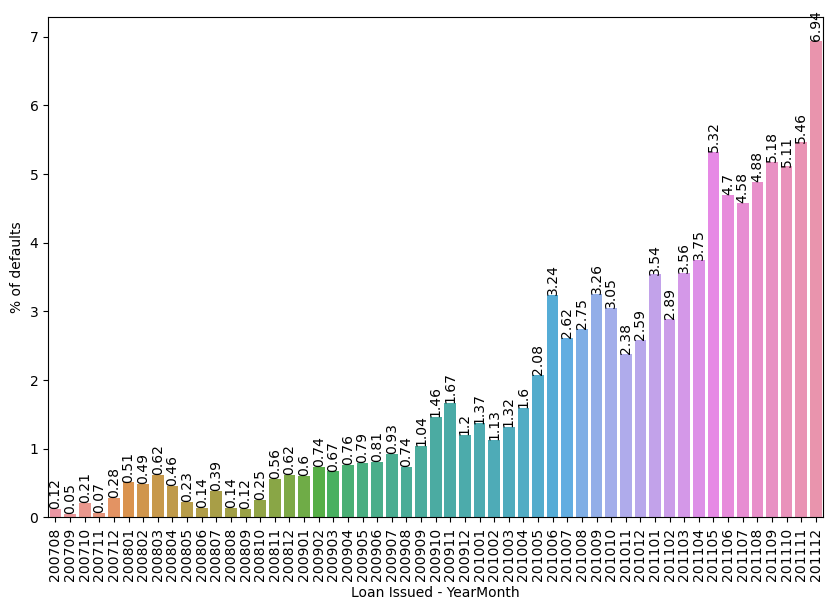

In [47]:
# Get Percentage values for borrower count and plot them in a bar chart

fig, ax = plt.subplots(figsize=(10,6.5))
df_loan_ym = df_loan_subset_chargedoff.groupby('issue_yearmonth').count()
df_loan_ym['percent'] = round((df_loan_ym['loan_amnt'] / df_loan_ym['loan_amnt'].sum()) * 100,2)
c_ym = sns.barplot(x=df_loan_ym.index, y='percent', data=df_loan_ym)
c_ym.set_xlabel('Loan Issued - YearMonth')
c_ym.set_ylabel('% of defaults')
plt.xticks(rotation="90")
for label in c_ym.containers:
    c_ym.bar_label(label, rotation='vertical')    
plt.show()

In [48]:
# Inference
# The percentage of defaults have steadily increased over time

### Step 9.4 - Analyse continuous variables

#### 9.4.1 Summary Metrics

In [49]:
df_loan_subset_chargedoff.describe()

,loan_amnt,int_rate,emp_length,annual_inc,dti,pub_rec,revol_util,issue_month
count,4321.00000,4321.00000,4321.00000,4321.00000,4321.00000,4321.00000,4306.00000,4321.00000
mean,8825.92571,13.28869,4.67160,49592.74338,14.05289,0.09327,54.96898,7.24416
std,4782.42624,3.48832,3.45490,21298.54879,6.62019,0.29791,28.01859,3.36765
min,900.00000,5.42000,0.00000,4080.00000,0.00000,0.00000,0.00000,1.00000
25%,5000.00000,10.99000,1.00000,34560.00000,9.08000,0.00000,33.40000,5.00000
50%,8000.00000,13.23000,4.00000,46800.00000,14.33000,0.00000,57.70000,8.00000
75%,12000.00000,15.65000,8.00000,62000.00000,19.46000,0.00000,78.50000,10.00000
max,19900.00000,24.40000,10.00000,114600.00000,29.85000,2.00000,99.90000,12.00000


#### 9.4.2 Understanding the distribution of continuous variables

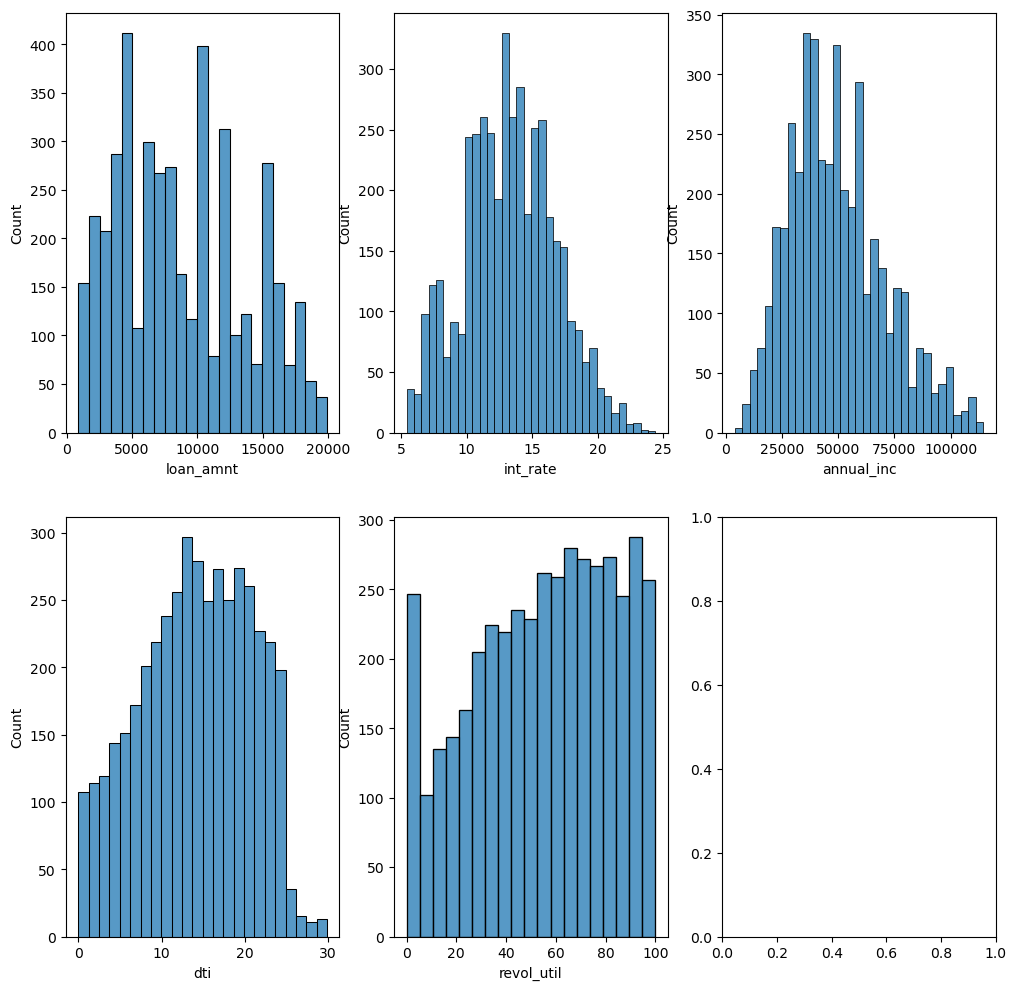

In [50]:

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,12))

sns.histplot(df_loan_subset_chargedoff['loan_amnt'], ax=axes[0,0])
sns.histplot(df_loan_subset_chargedoff['int_rate'], ax=axes[0,1])
sns.histplot(df_loan_subset_chargedoff['annual_inc'], ax=axes[0,2])
sns.histplot(df_loan_subset_chargedoff['dti'], ax=axes[1,0])
sns.histplot(df_loan_subset_chargedoff['revol_util'], ax=axes[1,1])

plt.show()


### Step 9.5 - Segmented Univariate Analysis

#### 9.5.1 Binning loan_amnt to categorize the scale of money lended

In [51]:
df_loan_subset_chargedoff.loan_amnt.min()

900

In [52]:
df_loan_subset_chargedoff.loan_amnt.max()

19900

C:\Users\saikrupa.p\AppData\Local\Temp\ipykernel_7324\2757317240.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loan_subset_chargedoff['bin_loan_amnt'] = pd.cut(df_loan_subset_chargedoff['loan_amnt'] , bins=loan_amt_bins, labels=loan_amnt_labels)


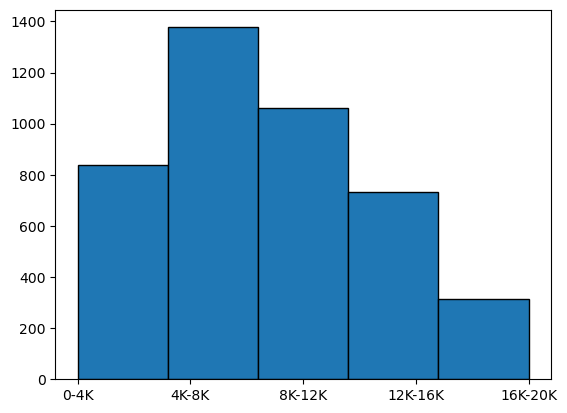

In [53]:
# Defining bins and plotting a histogram chart

loan_amt_bins = [0,4000,8000,12000,16000,20000]
loan_amnt_labels = ['0-4K','4K-8K','8K-12K','12K-16K','16K-20K']
df_loan_subset_chargedoff['bin_loan_amnt'] = pd.cut(df_loan_subset_chargedoff['loan_amnt'] , bins=loan_amt_bins, labels=loan_amnt_labels)
n, bins, patches = plt.hist(df_loan_subset_chargedoff['bin_loan_amnt'], align='mid', bins=5,edgecolor='black')
plt.show()

In [54]:
# Inference
# Most defaults are in the range of 4K-8K and 8K-12K loan amounts

#### 9.5.2 - Binning dti values for analysis

In [55]:
df_loan_subset_chargedoff['dti'].min()

0.0

In [56]:
df_loan_subset_chargedoff['dti'].max()

29.85

In [57]:
# Defining bins and plotting a histogram chart for dti values

dti_bins = [0,5,10,15,20,25,30]
dti_labels = ['0-5','6-10','11-15','16-20','21-25','25-30']
df_loan_subset_chargedoff['bin_dti'] = pd.cut(df_loan_subset_chargedoff['dti'] , bins=dti_bins, labels=dti_labels)
df_loan_subset_chargedoff['bin_dti'].value_counts()

C:\Users\saikrupa.p\AppData\Local\Temp\ipykernel_7324\1945708708.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loan_subset_chargedoff['bin_dti'] = pd.cut(df_loan_subset_chargedoff['dti'] , bins=dti_bins, labels=dti_labels)


11-15    1086
16-20    1044
21-25     893
6-10      748
0-5       460
25-30      63
Name: bin_dti, dtype: int64

In [58]:
# Inference
# The Debt to Income ratio of 11-20 has the highest number of defaults

## Step 10 - Bivariate Analysis

In [59]:
df_loan_subset_chargedoff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4321 entries, 1 to 39678
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   loan_amnt            4321 non-null   int64   
 1   term                 4321 non-null   object  
 2   int_rate             4321 non-null   float64 
 3   grade                4321 non-null   object  
 4   sub_grade            4321 non-null   object  
 5   emp_length           4321 non-null   int32   
 6   home_ownership       4321 non-null   object  
 7   annual_inc           4321 non-null   float64 
 8   verification_status  4321 non-null   object  
 9   issue_d              4321 non-null   object  
 10  loan_status          4321 non-null   object  
 11  purpose              4321 non-null   object  
 12  addr_state           4321 non-null   object  
 13  dti                  4321 non-null   float64 
 14  pub_rec              4321 non-null   int64   
 15  revol_util          

#### Step 10.1 - Analyse the relationship between purpose and int_rate

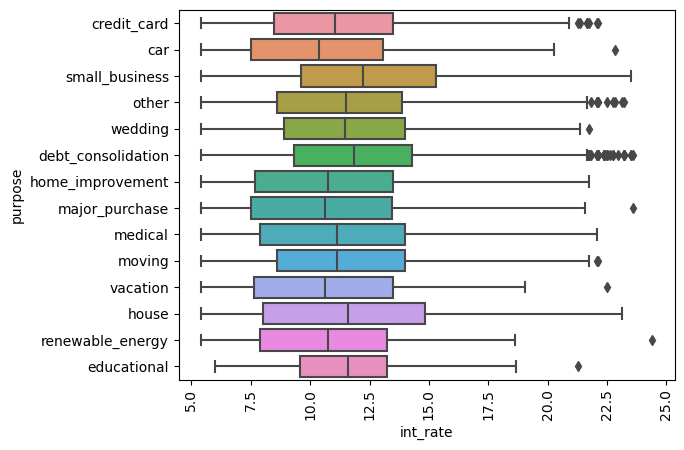

In [60]:
sns.boxplot(x='int_rate', y='purpose', data=df_loan_subset)
plt.xticks(rotation="90")
plt.show()

In [61]:
# Inference
# Interest rates are higher for small business, debt_consolidation and education

#### Step 10.2 - Analyse the percentage of loan_amnt share across between fully paid and charged off loans across categories

In [62]:
##### Categories Analysed - Grade, emp_length, home_ownership, verification_status

In [63]:
def CalculateChargeOffPercentage(df_dataset):
    chargedoffpercentage = []
    for i in range(df_dataset.shape[0]):
        pct = (df_dataset['Charged Off'][i] / (df_dataset['Charged Off'][i] + df_dataset['Fully Paid'][i])) * 100
        chargedoffpercentage.append(round(pct,2))
    df_dataset['chargedoff_percent'] = chargedoffpercentage

##### Step 10.2.1 - Analyse Charge off % over grade

In [64]:
df_loan_amnt_pivot = df_loan_subset.pivot_table(index=['grade'], columns='loan_status', values='loan_amnt', aggfunc='sum')
CalculateChargeOffPercentage(df_loan_amnt_pivot)
df_loan_amnt_pivot

loan_status,Charged Off,Fully Paid,chargedoff_percent
grade,,,
A,4135500,63745850,6.09000
B,9905950,69293975,12.51000
C,9361250,42924925,17.90000
D,7940500,27058950,22.69000
E,4604025,12205375,27.39000
F,1656400,3622175,31.38000
G,533200,698925,43.27000


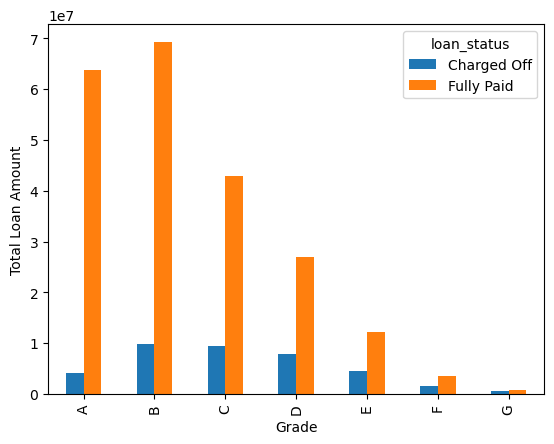

In [65]:
c_grade = df_loan_amnt_pivot[['Charged Off','Fully Paid']].plot.bar()
c_grade.set_xlabel('Grade')
c_grade.set_ylabel('Total Loan Amount')
plt.show()

In [66]:
#Inference
# Grades G, F and E have the highest percentage of Charged Off loans 

##### Step 10.2.2 - Analyse Charge off % over years of work experience

In [67]:
df_loan_amnt_pivot = df_loan_subset.pivot_table(index=['emp_length'], columns='loan_status', values='loan_amnt', aggfunc='sum')
CalculateChargeOffPercentage(df_loan_amnt_pivot)
df_loan_amnt_pivot

loan_status,Charged Off,Fully Paid,chargedoff_percent
emp_length,,,
0,1436925,4988025,22.36000
1,7355975,43441275,14.48000
2,3783075,24636325,13.31000
3,3904650,23337150,14.33000
4,3200425,19910575,13.85000
5,3226650,18814200,14.64000
6,2108125,12911500,14.04000
7,2075200,10122150,17.01000
8,1333025,8511000,13.54000


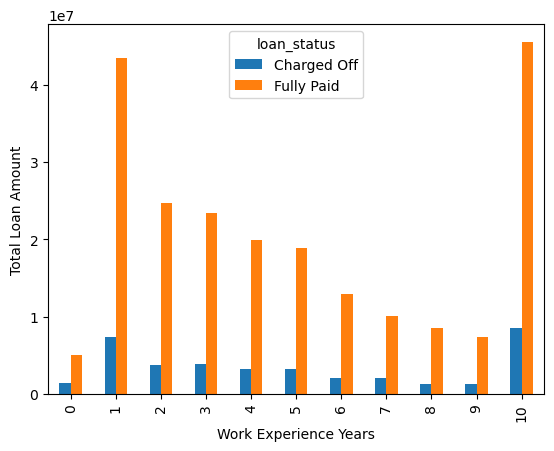

In [68]:
c_emp_length = df_loan_amnt_pivot[['Charged Off','Fully Paid']].plot.bar()
c_emp_length.set_xlabel('Work Experience Years')
c_emp_length.set_ylabel('Total Loan Amount')
plt.show()

In [69]:
#Inference
# ~20% of the loan amount given to students or borrowers with no work experience is charged off or is considered defaulted loan
# ~15% of the loan amount given to borrowers with work experience of 7 years is charged off

##### Step 10.2.3 - Analyse Charge off % over years of home ownership

In [70]:
df_loan_amnt_pivot = df_loan_subset.pivot_table(index=['home_ownership'], columns='loan_status', values='loan_amnt', aggfunc='sum')
CalculateChargeOffPercentage(df_loan_amnt_pivot)
df_loan_amnt_pivot = df_loan_amnt_pivot[df_loan_amnt_pivot.index != "NONE"]
df_loan_amnt_pivot

loan_status,Charged Off,Fully Paid,chargedoff_percent
home_ownership,,,
MORTGAGE,15345200.00000,92763100.00000,14.19000
OTHER,182450.00000,632025.00000,22.40000
OWN,3008275.00000,16798950.00000,15.19000
RENT,19600900.00000,109342100.00000,15.20000


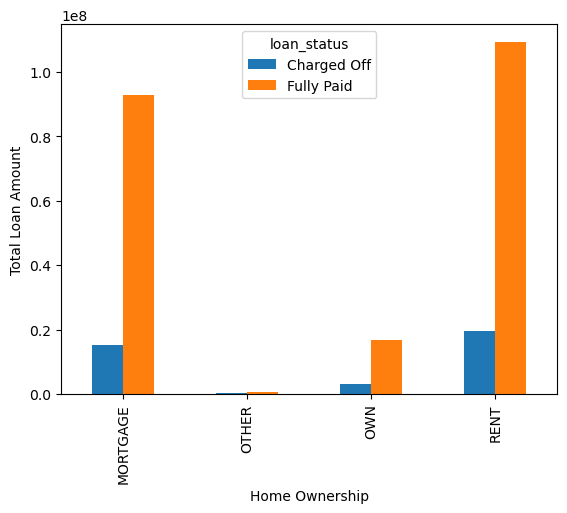

In [71]:
c_emp_length = df_loan_amnt_pivot[['Charged Off','Fully Paid']].plot.bar()
c_emp_length.set_xlabel('Home Ownership')
c_emp_length.set_ylabel('Total Loan Amount')
plt.show()

In [72]:
# Inference
# Though the overall loan amount against “Other” is small, the percentage of default loan amount is higher.
# For other categories like Own, Rent and Mortgage, the % of default loan is similar. 

##### Step 10.2.4 - Analyse Charge off % over years of verification status

In [73]:
df_loan_amnt_pivot = df_loan_subset.pivot_table(index=['verification_status'], columns='loan_status', values='loan_amnt', aggfunc='sum')
CalculateChargeOffPercentage(df_loan_amnt_pivot)
df_loan_amnt_pivot

loan_status,Charged Off,Fully Paid,chargedoff_percent
verification_status,,,
Not Verified,15313375,102061925,13.05000
Source Verified,10444375,58620500,15.12000
Verified,12379075,58867750,17.37000


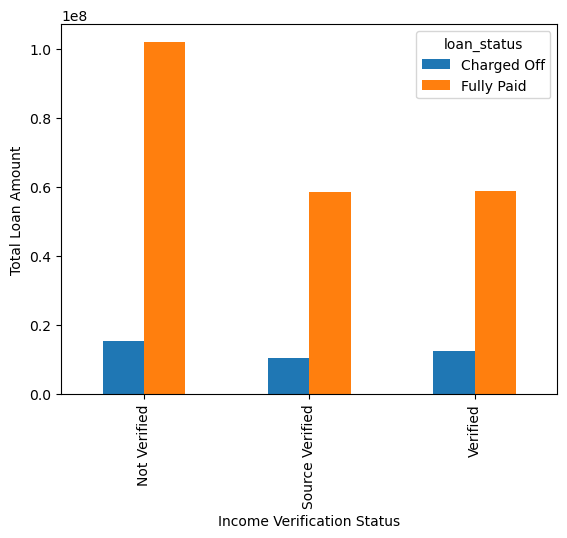

In [74]:
c_emp_length = df_loan_amnt_pivot[['Charged Off','Fully Paid']].plot.bar()
c_emp_length.set_xlabel('Income Verification Status')
c_emp_length.set_ylabel('Total Loan Amount')
plt.show()

In [75]:
#Inference
#13-17% of the loan amount is charged off irrespective of the income verification status

##### Step 10.2.4 - Analyse the relationship between months and charged off loan amount

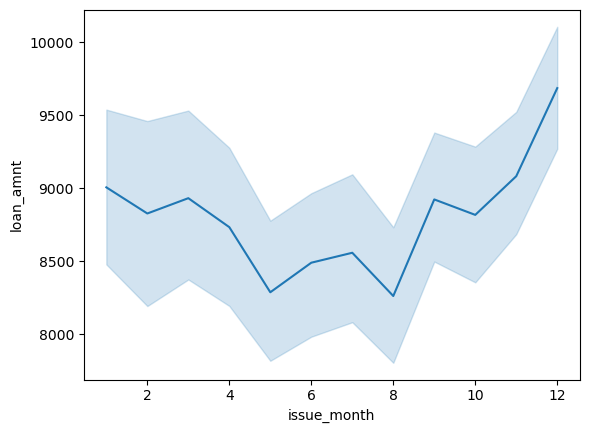

In [76]:
fig, ax = plt.subplots()
ax = sns.lineplot(data=df_loan_subset_chargedoff,x='issue_month', y='loan_amnt')
#ax1 = sns.lineplot(data=df_loan_subset_chargedoff,x='issue_month', y=df_loan_subset_chargedoff.issue_month.value_counts())

In [77]:
#Inference
# Loans issued during the end of the year are defaulted more compared to the other months

## Step 11 - Multivariate analysis across various continous variables

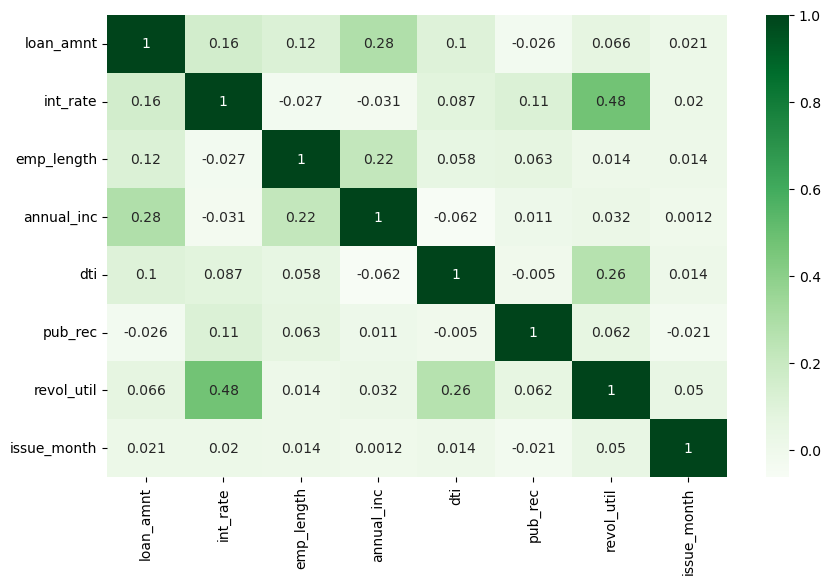

In [78]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(df_loan_subset.corr(), cmap="Greens",annot=True, ax=ax)
plt.show()


In [79]:
# Inference
# revol_util has a positive correlation with dti and interest_rate

# Recommendation Summary

In [80]:
## Major Driving Factors for loan defaults
#### ---- Home Ownership – Borrowers whose home ownership values are rent or mortgage have a higher risk of defaulting loans. 
#### ---- Purpose – If the purpose of the loan is debt consolidation, there is a higher probability of defaulting loans
#### ---- Income Verification – If the income is not verified, higher the risk of default
#### ---- Work Experience – Borrowers with work experience range between 0-1 and 10+ years have had a higher default loan amount value.  
#### ---- Issue Month – Loans issued during the months of December, January have higher default loan amounts. 
#### ---- Loan Amounts – Borrowers who took loans for amounts in the range of 4K-12K have defaulted more. 

## Major Driving Factors for loan sanctions
#### ---- Interest Rate & Purpose – In the past, higher interest loans had been sanctioned for purposes like small business, house, debt consolidation. The Finance company can look at loan applicants for these purposes for higher interest rates and hence higher income.
#### ---- Grade – Applicants from Grade A have less defaulted loans. Company can look to sanction loans to applicants in Grade A
 
